## GTNNWR Case--spatial and temporal distribution of key nutrients in coastal waters

### Case Introduction 

- A spatiotemporal-intelligent method for fine-scale retrieval of DSi in coastal seas  
This case shows a spatiotemporally weighted intelligent method acquired high-resolution and long-term distributions of coastal dissolved silicate (DSi). Fine-scale DSi changes and influences driven by biological and physical factors were observed and revealed in coastal seas.  


###  Case Background

The migration of dissolved silicate (DSi) from land to coastal environments is an important component of the global biogeochemical cycle. Due to the strong land-ocean interaction in coastal waters, the spatial distribution of coastal DSi exhibits irregular characteristics (influenced by land input and ocean terrain), and the time changes rapidly with brief periodic fluctuations (influenced by biological effects and ocean currents). However, due to the immaturity of spatiotemporal modeling and the low resolution of data sampling, current research on coastal DSi typically depicts its rough changes with spatial and seasonal temporal resolutions of hundreds of kilometers. Therefore, this project will combine advanced spatiotemporal analysis models and high-resolution datasets to analyze changes in the distribution of offshore DSi at higher spatiotemporal resolutions.
> [Qi, J., Du, Z., Wu, S., Chen, Y., & Wang, Y. (2023). A spatiotemporally weighted intelligent method for exploring fine-scale distributions of surface dissolved silicate in coastal seas. Science of The Total Environment , 886, 163981.  ](https://doi.org/10.1016/j.scitotenv.2023.163981)  

### Data used
- The DSi dataset of Zhejiang offshore surface from 2010 to 2018 (obtained by matching the MODIS remote sensing dataset with the dissolved silicate site dataset on the offshore surface).

### Case Process 
- Dependency Library Installation 
- Dataset Import 
- Model Settings 
- Model Training 
- Model Result Output

### Schematic diagram of the research area

![Image Name](https://mydde.deep-time.org/s3/static-files/upload/upload/1695121607986_1.jpg)  


#### Install the gnnwr model library 
The gnnwr model library includes the GNNWR model and GTNNWR model, supporting high-precision spatiotemporal non-stationary and complex nonlinear modeling. Its installation method is as follows:
```bash  
pip install gnnwr  
```

#### Dependency Library Installation

In [1]:
import os
import sys
import numpy as np
import pandas as pd
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from src.gnnwr.datasets import init_dataset
from src.gnnwr.models import GTNNWR

In [2]:
data = pd.read_csv('../data/demo_data_gtnnwr.csv')
data

,refl_b01,refl_b02,refl_b03,refl_b04,refl_b05,refl_b07,proj_x,proj_y,day,SiO3
0,1895,1251,1737,1872,543,280,736685.4179,3314205.295,113,1.049
1,1621,1066,1435,1665,757,511,736685.4179,3314205.295,121,1.209
2,1587,1141,1807,1864,1211,1024,736685.4179,3314205.295,152,1.102
3,1121,1012,1411,1324,711,485,768193.4945,3402138.581,168,0.945
4,913,203,840,1035,114,63,736685.4179,3314205.295,200,1.350
...,...,...,...,...,...,...,...,...,...,...
2896,652,113,574,900,63,40,672566.9172,3367567.277,221,2.370
2897,1741,1026,2092,2079,590,229,672566.9172,3367567.277,219,2.954
2898,1519,643,756,1298,193,106,672566.9172,3367567.277,283,2.837
2899,1672,1066,1404,1741,982,885,672566.9172,3367567.277,129,1.647


#### Dataset Import   
- Through the "init_dataset()" function, users can set input data, test set size, validation set size, independent variable, dependent variable, spatial attribute, time attribute, numbered column, random seed, and batch size.
- The initialized dataset can be saved using the "save()" method and the read method can be used to "read()" the saved results.

In [3]:
data["id"] = np.arange(len(data))
train_dataset, val_dataset, test_dataset = init_dataset(data=data,
                                                        test_ratio=0.15,
                                                        valid_ratio=0.1,
                                                        x_columns=['refl_b01', 'refl_b02',\
                                                        'refl_b03','refl_b04','refl_b05',\
                                                        'refl_b07'],
                                                        y_column=['SiO3'],
                                                        spatial_columns=['proj_x', 'proj_y'],
                                                        temporal_column=['day'],
                                                        id_column=['id'],
                                                        model_type="gtnnwr",
                                                        sample_seed=48,
                                                        batch_size=1024)

#### Model Settings  
- The model accepts parameters such as training set, validation set, test set, hidden layer, and optimizer, and can set network structure, optimizer type, and learning rate adjustment method.
- The "add_graph()" function can be used to save the graph structure (chart) of the model, which can be viewed in Tensorboard.

In [4]:
optimizer_params = {
    "scheduler":"MultiStepLR",
    "scheduler_milestones":[1000, 2000, 3000, 4000],
    "scheduler_gamma":0.8,
}
gtnnwr = GTNNWR(train_dataset, val_dataset, test_dataset, [[3], [512,256,64]],drop_out=0.4,optimizer='Adadelta',optimizer_params=optimizer_params,
                write_path = "../demo_result/gtnnwr_runs",
                model_name="GTNNWR_DSi")
gtnnwr.add_graph()

e:\CODE\gnnwr\src\gnnwr\models.py:916: FutureWarning: Future versions will only use dense_layers to set the network structure of SWNN, the network structure of STPNN will be set by STPNN_params
  warnings.warn("Future versions will only use dense_layers to set the network structure of SWNN, the network structure of STPNN will be set by STPNN_params", FutureWarning)


Add Graph Successfully


#### Model Training  
- 使用run方法可以进行模型训练，并可以设置训练步长和早停步长。

In [5]:
gtnnwr.run(15000,1000)

  0%|          | 0/15000 [00:00<?, ?it/s]e:\CODE\gnnwr\src\gnnwr\utils.py:203: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\autograd\generated\python_variable_methods.cpp:837.)
  return float(1 - torch.sum(self.__residual ** 2) / torch.sum((self.__y_data - torch.mean(self.__y_data)) ** 2))
 39%|███▉      | 5871/15000 [29:46<46:17,  3.29it/s, Train Loss=0.1830, Train R2=0.6824, Train RMSE=0.4277, Train AIC=2532.6045, Valid Loss=0.2363, Valid R2=0.5671, Valid RMSE=0.4803, Best Valid R2=0.6160, Learning Rate=0.041]   


Training stop! Model has not been improved for over 1001 epochs.


In [6]:
gtnnwr.load_model('../demo_result/gtnnwr_models/GTNNWR_DSi.pkl')

#### Model Result Output  
- Using 'result()' can obtain the basic information of the optimal model and the running results of the model on the test set
- Using 'reg_result()' can save the running results of the optimal model on the entire dataset, including the spatiotemporal non-stationary weights calculated by the model.

In [7]:
gtnnwr.result()

--------------------Model Information-----------------
Model Name:           | GTNNWR_DSi
independent variable: | ['refl_b01', 'refl_b02', 'refl_b03', 'refl_b04', 'refl_b05', 'refl_b07']
dependent variable:   | ['SiO3']

OLS coefficients: 
x0: 7.70582
x1: 0.80789
x2: 0.35238
x3: -7.27008
x4: 2.71207
x5: -2.70717
Intercept: 1.14341

--------------------Result Information----------------
Test Loss: |                   0.41144
Test R2  : |                   0.23420
Train R2 : |                   0.19400
Valid R2 : |                   0.26125
RMSE: |                        0.64733
AIC:  |                      858.83051
AICc: |                      861.59723
F1:   |                        0.60752
F2:   |                       13.62157
f3_param_0: |                  3.38985
f3_param_1: |                  7.30124
f3_param_2: |                  0.98389
f3_param_3: |                  0.06445
f3_param_4: |                  3.25579
f3_param_5: |                 27.95416
f3_param_6: |             

In [8]:
gtnnwr.reg_result('./gtnnwr_result.csv')

Result saved as e:\CODE\gnnwr\demo\gtnnwr_result.csv


,coef_refl_b01,coef_refl_b02,coef_refl_b03,coef_refl_b04,coef_refl_b05,coef_refl_b07,bias,Pred_SiO3,id,dataset_belong,denormalized_pred_result
0,0.437216,0.069203,0.205115,2.852226,-1.636994,0.575874,0.629440,0.727771,1330.0,train,0.727771
1,8.569552,0.159013,0.000432,-3.982711,-2.636374,0.637821,0.412058,1.533266,778.0,train,1.533266
2,0.433636,-0.038278,0.151537,4.145742,-2.610356,-0.473859,0.602780,1.274971,97.0,train,1.274971
3,6.567074,0.160279,0.220753,-2.016209,-1.193546,3.471960,0.601652,1.738569,1977.0,train,1.738569
4,4.680723,-0.006601,0.153714,2.584178,-2.755975,-1.203071,0.377894,1.445697,784.0,train,1.445697
...,...,...,...,...,...,...,...,...,...,...,...
2896,5.502327,-0.017973,0.202052,-1.661151,-0.522249,1.710472,0.309576,1.088831,1856.0,test,1.088831
2897,7.887565,0.326392,0.261182,-3.964790,-1.852954,3.586028,0.668844,1.475730,2395.0,test,1.475730
2898,-0.114896,-0.103440,0.183367,2.098453,-1.115671,1.469767,0.438786,0.719932,1476.0,test,0.719932
2899,-0.370159,-0.044645,0.186226,2.747399,-1.447855,0.960673,0.519645,0.865846,1361.0,test,0.865846


#### Analysis of model results
- The output results of the model can be imported and analyzed through drawing images and other methods.

In [9]:
result_data = gtnnwr.reg_result()

In [10]:
result_data.head()

,coef_refl_b01,coef_refl_b02,coef_refl_b03,coef_refl_b04,coef_refl_b05,coef_refl_b07,bias,Pred_SiO3,id,dataset_belong,denormalized_pred_result
0,0.437216,0.069203,0.205115,2.852226,-1.636994,0.575874,0.629440,0.727771,1330.0,train,0.727771
1,8.569552,0.159013,0.000432,-3.982711,-2.636374,0.637821,0.412058,1.533266,778.0,train,1.533266
2,0.433636,-0.038278,0.151537,4.145742,-2.610356,-0.473859,0.602780,1.274971,97.0,train,1.274971
3,6.567074,0.160279,0.220753,-2.016209,-1.193546,3.471960,0.601652,1.738569,1977.0,train,1.738569
4,4.680723,-0.006601,0.153714,2.584178,-2.755975,-1.203071,0.377894,1.445697,784.0,train,1.445697


R2: 0.2055777385583828


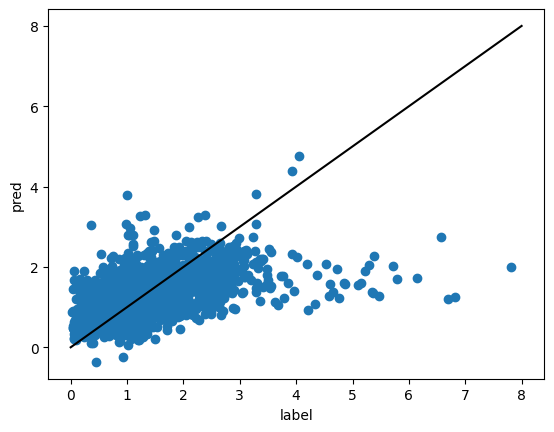

In [12]:
from sklearn.metrics import r2_score as r2
result_data.sort_values(by='id',inplace=True)
data.sort_values(by='id',inplace=True)
print('R2:',r2(data['SiO3'],result_data['Pred_SiO3']))
import matplotlib.pyplot as plt
plt.scatter(data['SiO3'],result_data['Pred_SiO3'])
plt.plot([i for i in range(9)],[i for i in range(9)],color='black')
plt.xlabel('label')
plt.ylabel('pred')
plt.show()

In [13]:
ana_data = pd.merge(data,result_data,on='id')

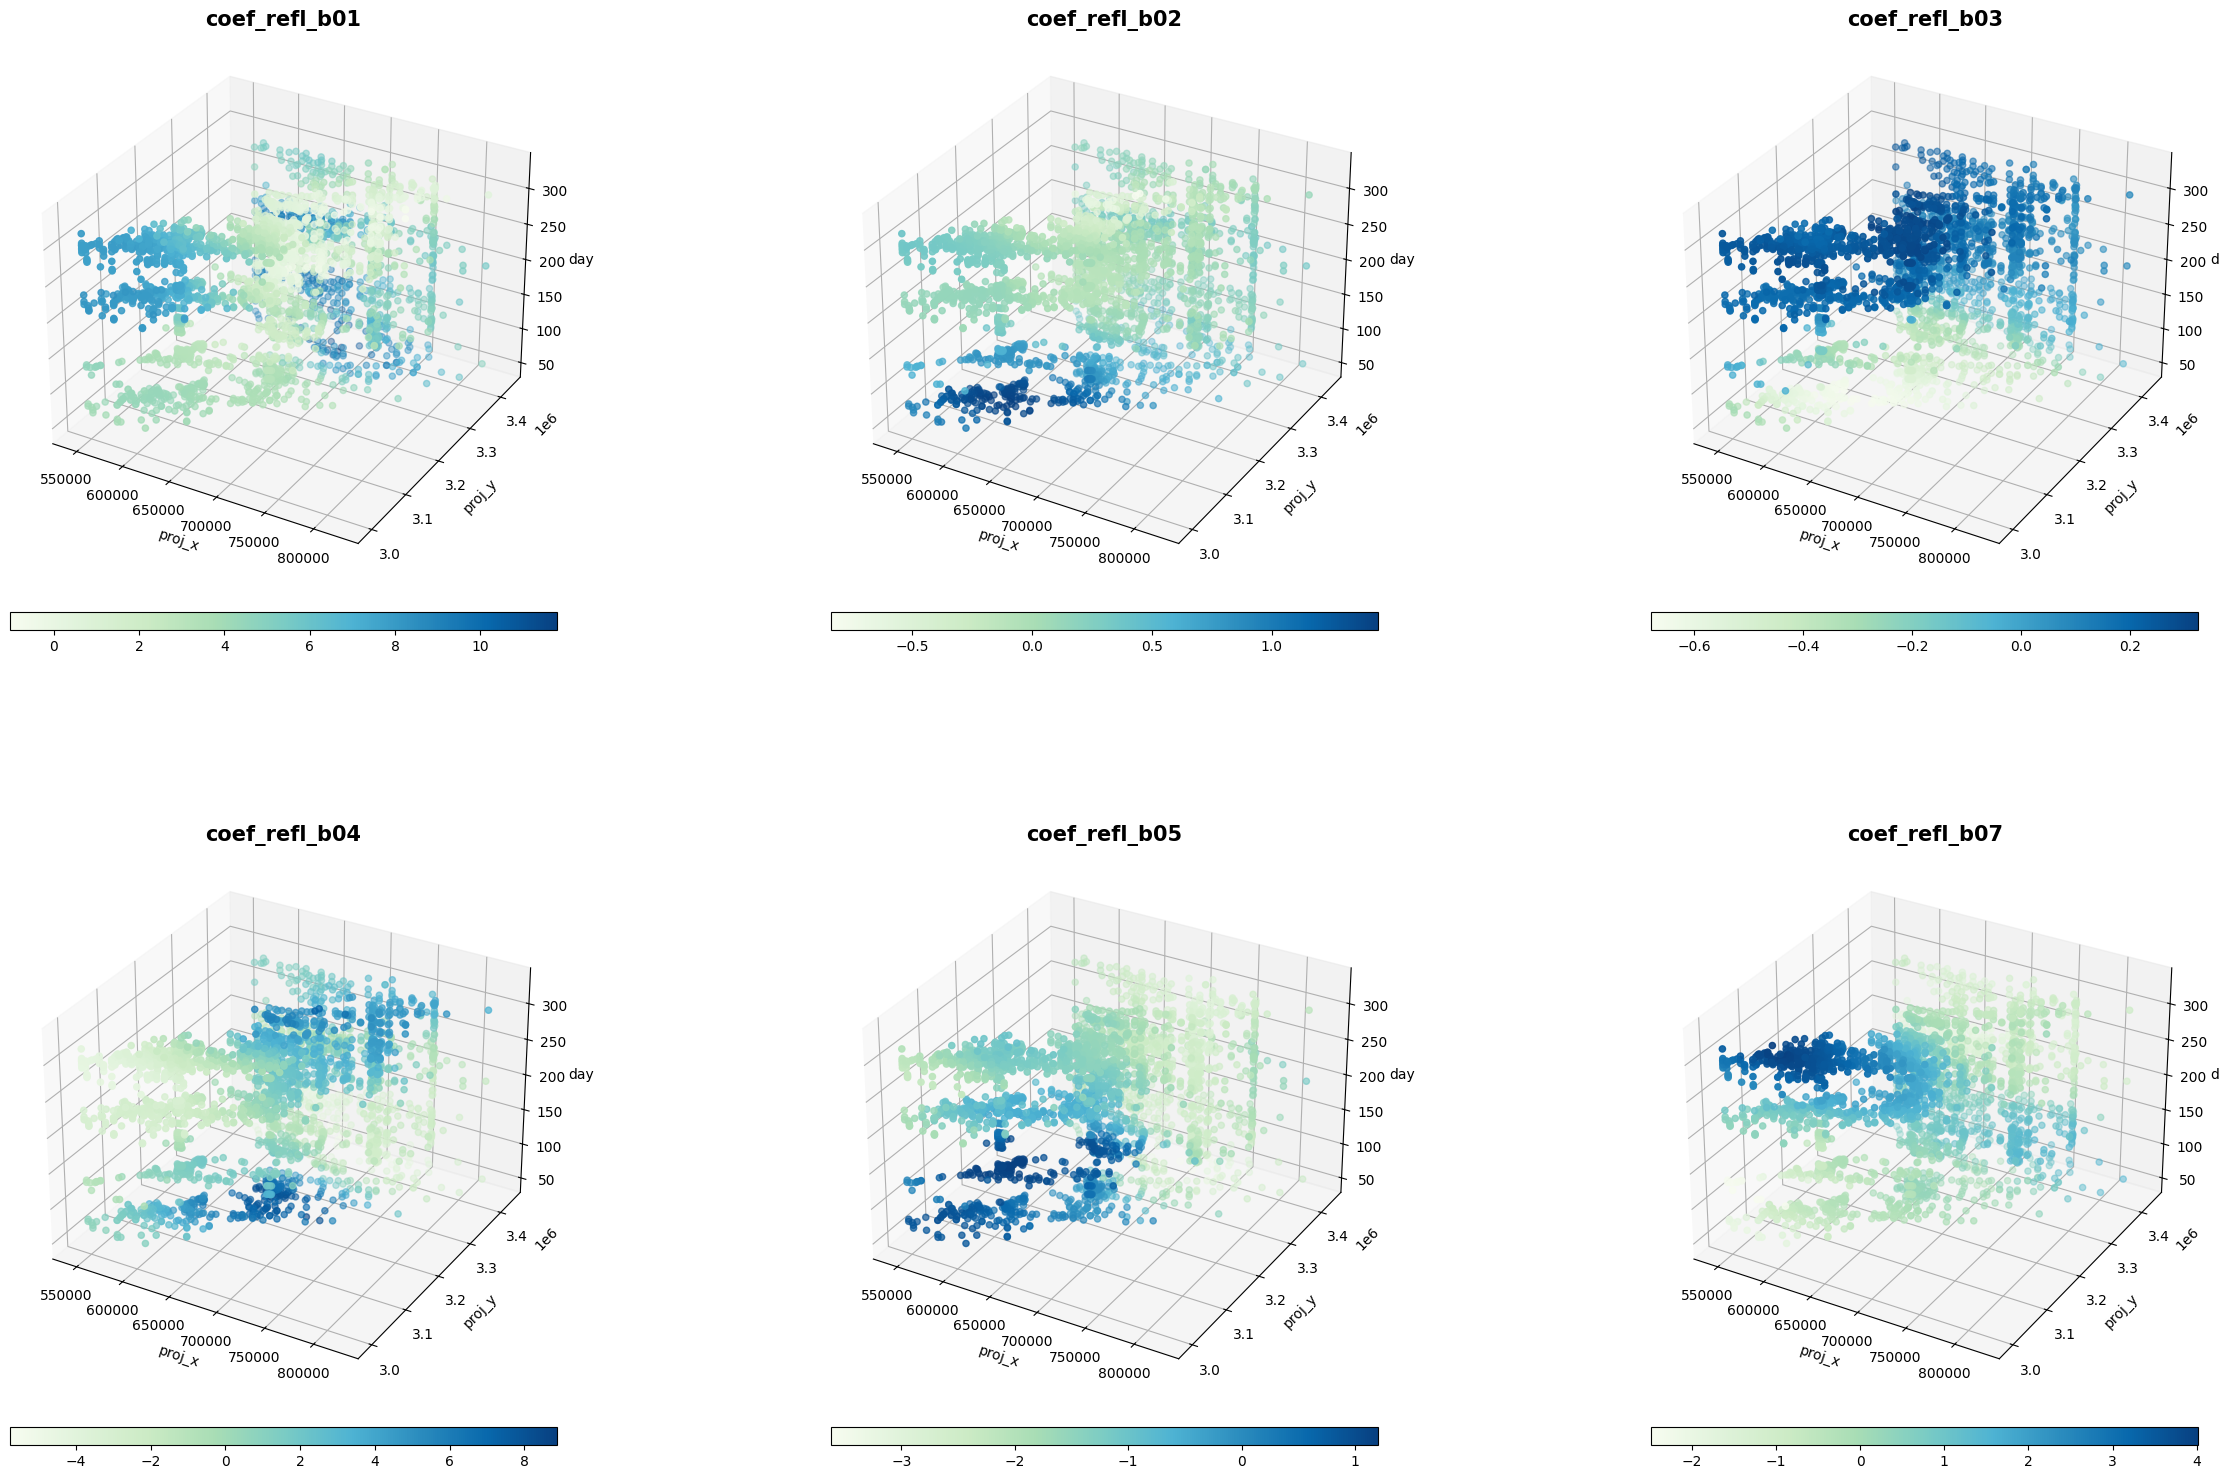

In [14]:
fig = plt.figure(figsize=(30,30))
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
id = 1
for i in [1,2,3,4,5,7]:
    ax = fig.add_subplot(3,3,id,projection='3d')
    fig.colorbar(ax.scatter(ana_data['proj_x'],ana_data['proj_y'],ana_data['day'],
                            c=ana_data['coef_refl_b0'+str(i)],cmap='GnBu'),
                shrink=0.8,aspect=30,orientation='horizontal',pad=0.05)
    ax.set_xlabel('proj_x')
    ax.set_ylabel('proj_y')
    ax.set_zlabel('day')
    ax.set_title('coef_refl_b0'+str(i),fontsize=15,fontweight='bold')
    id+=1
    